Number of nodes in the Pokemon network: 871
Number of edges in the Pokemon network: 379756
Average clustering coefficient of the Pokemon network: 1.0
Number of nodes in the random network: 871
Number of edges in the random network: 378885
Average clustering coefficient of the random network: 1.0


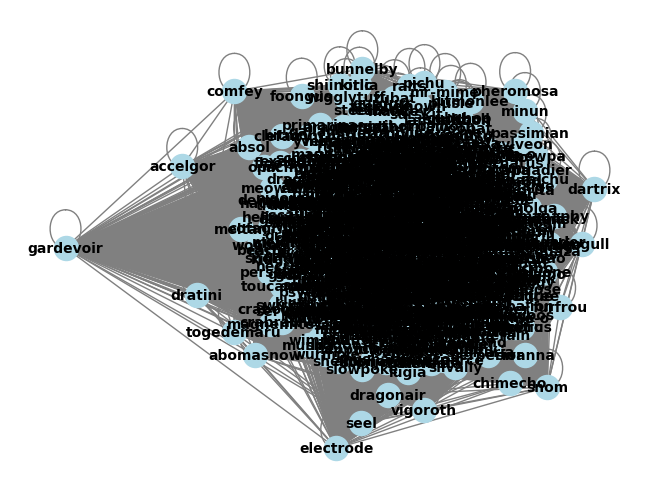

Degree sequence t-test:
t-statistic = inf
p-value = 0.0

Clustering coefficient t-test:
t-statistic = nan
p-value = nan


C:\Users\Ajit\AppData\Local\Temp\ipykernel_21032\2095396741.py:65: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  degree_tstat, degree_pvalue = ttest_ind(pokemon_degree_sequence, random_degree_sequence, equal_var=False)
C:\Users\Ajit\AppData\Local\Temp\ipykernel_21032\2095396741.py:66: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  clustering_tstat, clustering_pvalue = ttest_ind([pokemon_clustering_coefficient], [random_clustering_coefficient], equal_var=False)
C:\Users\Ajit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division 

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Load the similarity data from file
similarity_df = pd.read_csv('similarity.txt', sep=',', header=None, names=['pokemon1', 'pokemon2', 'similarity'])

# Get a unique list of all Pokemon names
all_pokemon = similarity_df['pokemon1'].unique()

# Create an empty similarity matrix
similarity_matrix = pd.DataFrame(index=all_pokemon, columns=all_pokemon)

# Fill the similarity matrix with similarity scores
for i, row in similarity_df.iterrows():
    similarity_matrix.loc[row['pokemon1'], row['pokemon2']] = row['similarity']

# Replace missing values with 0 (when two Pokemon don't have a similarity score)
similarity_matrix = similarity_matrix.fillna(0)

# Set the upper triangular part of the matrix to 0
similarity_matrix = similarity_matrix + np.triu(similarity_matrix, k=1)

# Create a weighted graph from the similarity matrix
G = nx.from_numpy_array(similarity_matrix.to_numpy())
nx.relabel_nodes(G, dict(enumerate(all_pokemon)), copy=False)

# Calculate various network properties of the Pokemon network
print("Number of nodes in the Pokemon network:", len(G.nodes))
print("Number of edges in the Pokemon network:", len(G.edges))
print("Average clustering coefficient of the Pokemon network:", nx.average_clustering(G))

# Generate a random graph with the same number of nodes and edges
random_G = nx.gnm_random_graph(len(G.nodes), len(G.edges))

# Calculate various network properties of the random graph
print("Number of nodes in the random network:", len(random_G.nodes))
print("Number of edges in the random network:", len(random_G.edges))
print("Average clustering coefficient of the random network:", nx.average_clustering(random_G))

# Visualize the Pokemon network
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_size=10, font_weight='bold')
plt.show()


# Calculate various network properties of the Pokemon network
pokemon_degree_sequence = [val for (node, val) in G.degree()]
pokemon_clustering_coefficient = nx.average_clustering(G)
pokemon_shortest_path_length = nx.average_shortest_path_length(G)

# Generate a random network with the same number of nodes and edges as the Pokemon network
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
p_edge = n_edges / (n_nodes * (n_nodes - 1) / 2)
G_random = nx.erdos_renyi_graph(n_nodes, p_edge)

# Calculate various network properties of the random network
random_degree_sequence = [val for (node, val) in G_random.degree()]
random_clustering_coefficient = nx.average_clustering(G_random)
random_shortest_path_length = nx.average_shortest_path_length(G_random)

# Compare the network properties of the Pokemon network to those of the random network using a t-test
degree_tstat, degree_pvalue = ttest_ind(pokemon_degree_sequence, random_degree_sequence, equal_var=False)
clustering_tstat, clustering_pvalue = ttest_ind([pokemon_clustering_coefficient], [random_clustering_coefficient], equal_var=False)
shortest_path_length_tstat, shortest_path_length_pvalue = ttest_ind([pokemon_shortest_path_length], [random_shortest_path_length], equal_var=False)

# Print the t-test results
print('Degree sequence t-test:')
print('t-statistic =', degree_tstat)
print('p-value =', degree_pvalue)
print()
print('Clustering coefficient t-test:')
print('t-statistic =', clustering_tstat)
print('p-value =', clustering_pvalue)
